## 0. Some basic imports

In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import networkx as nx
import numpy as np


In [44]:
from graph_visualization import InteractiveGraph
from utils import PcstInstance, solve_pcst
from utils.ppi import PpiInstance, read_ppi, read_terminals, CoVexEdgeWeight, UnitEdgeWeight

# 1. Loading the instance

In [45]:
# Instance
graph = read_ppi("../../data/2020-07-07/protein-protein-interaction.txt")
terminals = read_terminals("../../data/2020-07-07/all-seeds/0001475.txt")
edge_weights = CoVexEdgeWeight(graph, 0.5)
#edge_weights = UnitEdgeWeight()
ppi_instance = PpiInstance(graph, terminals, edge_weights)

Setting the graph_diameter to the precomputed value of 8. Directly specify meta to overwrite this.


# 2. Solving the instance

In [46]:
from utils import ExpMinMaxDiverseSteinerTreeComputer, display_solution_set

Vertices in all solutions:  107
Average size of solution:  44.18181818181818
Average cost of solution: 1602.9426736514915
Minimum cost of solution: 1550.5771255519064
Maximum cost of solution: 1688.8691837427814


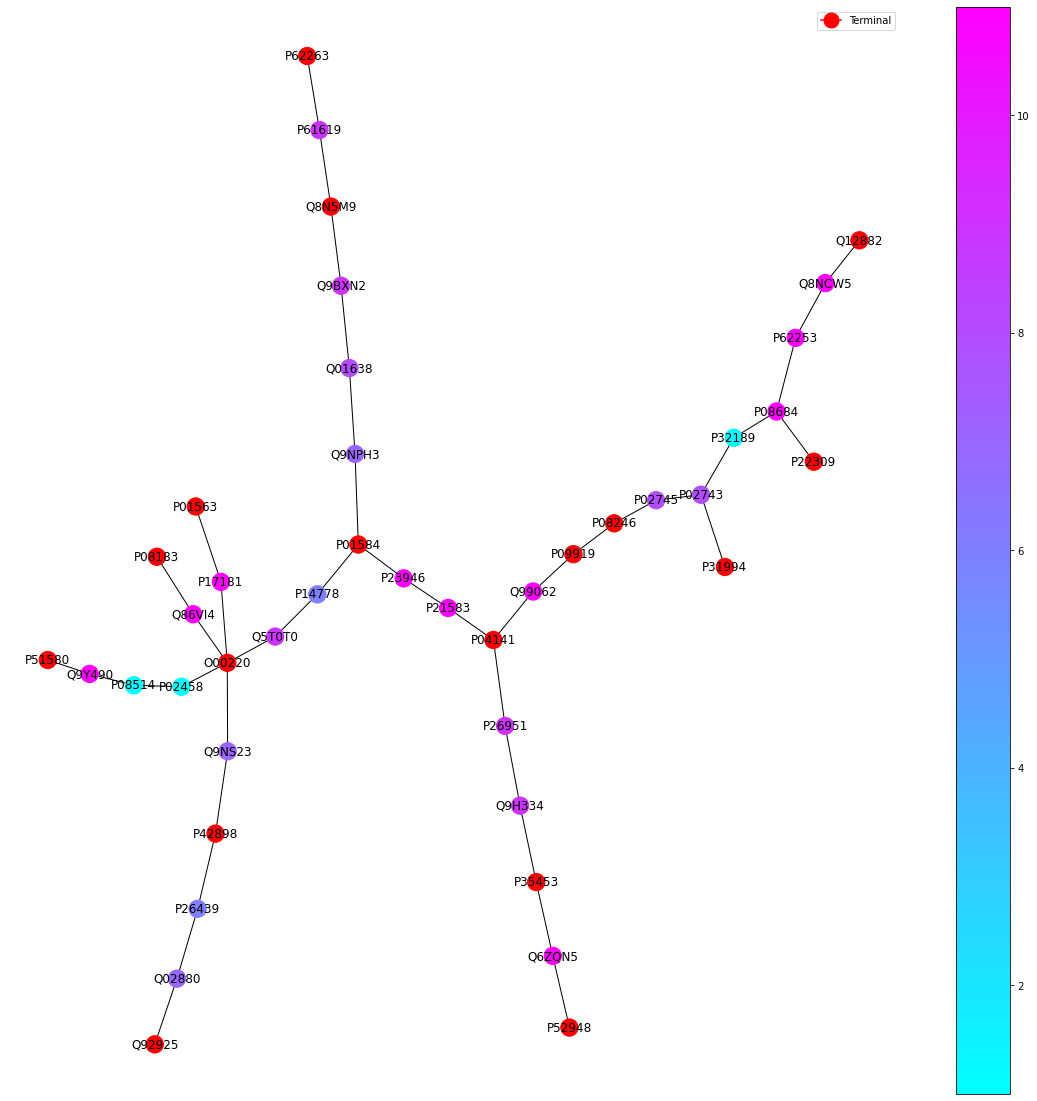

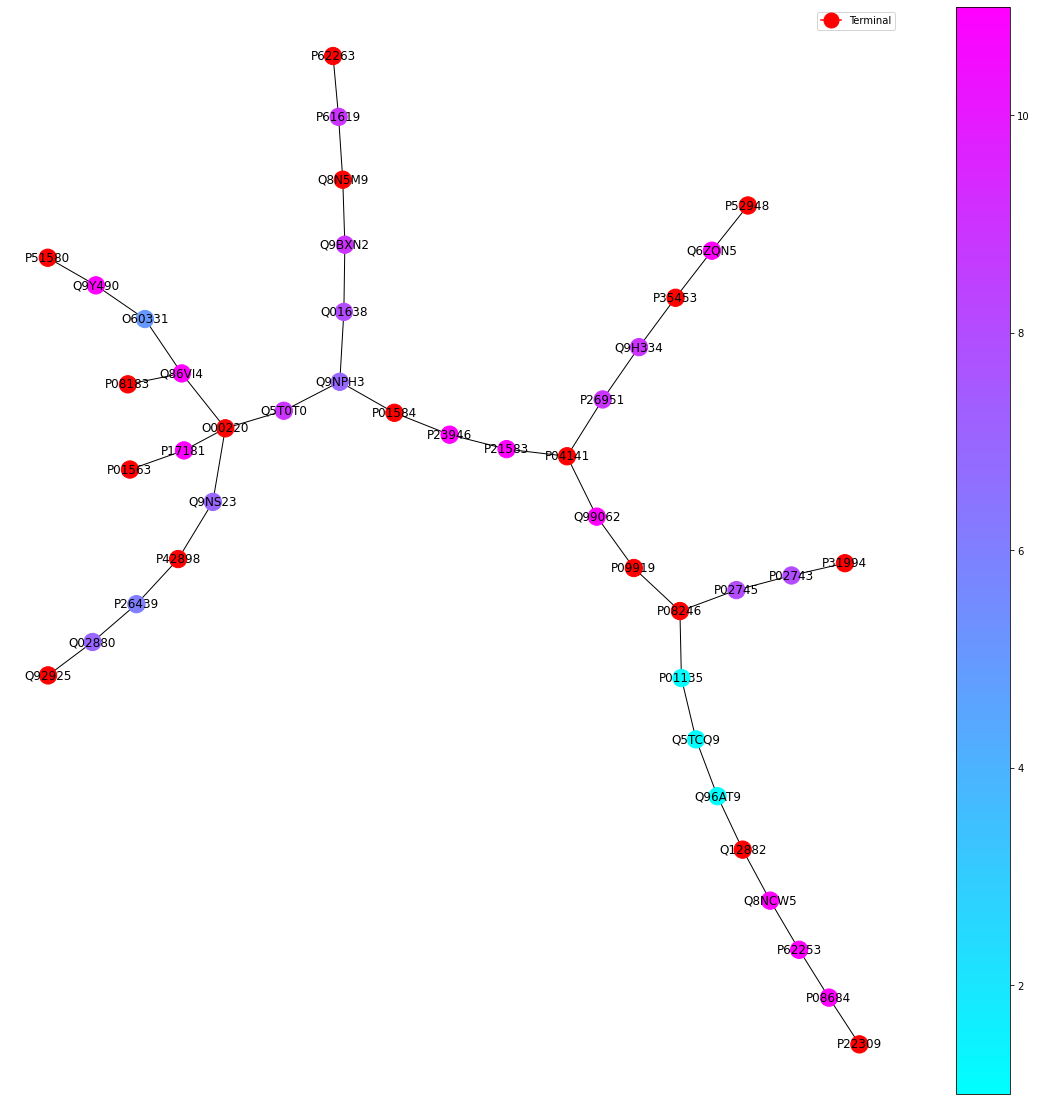

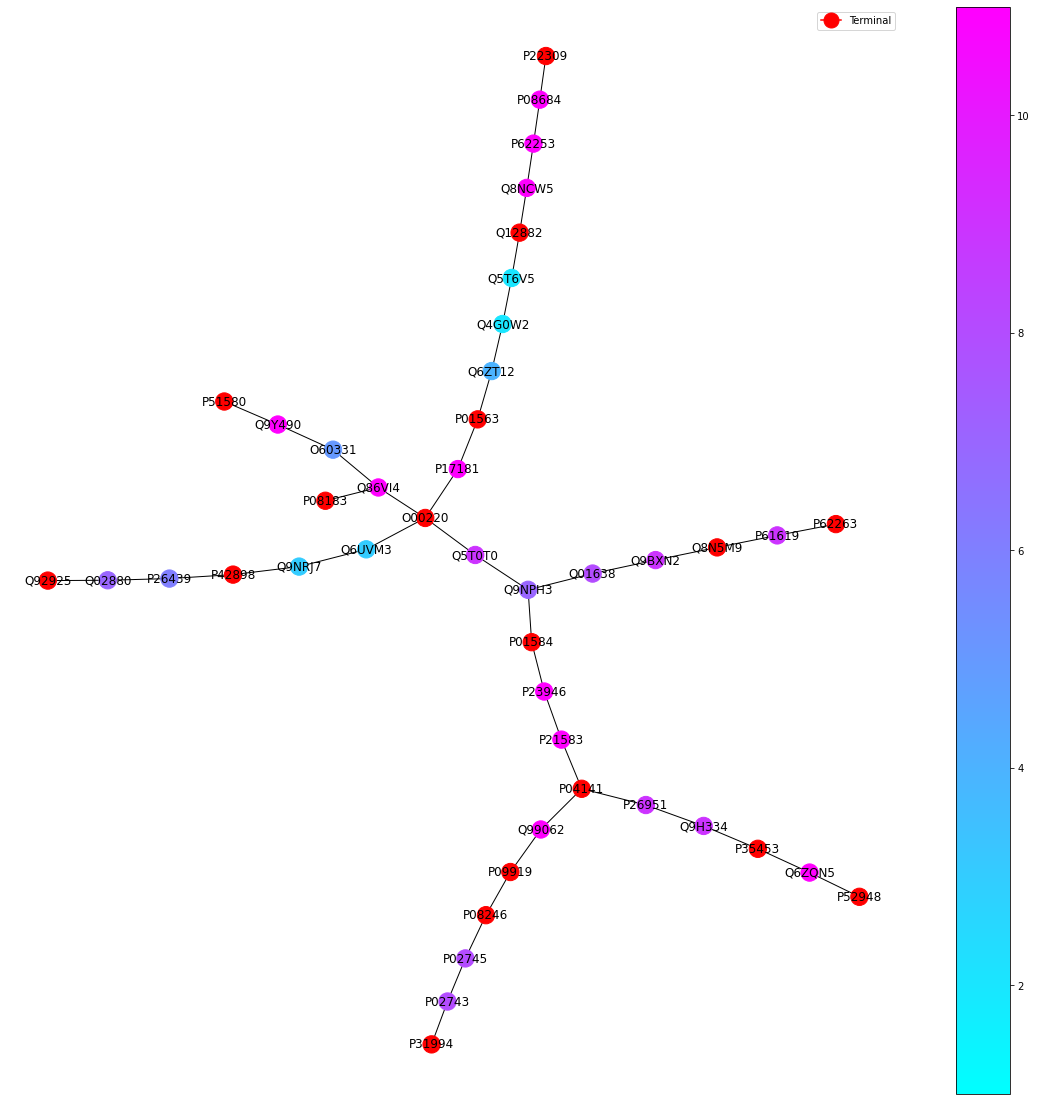

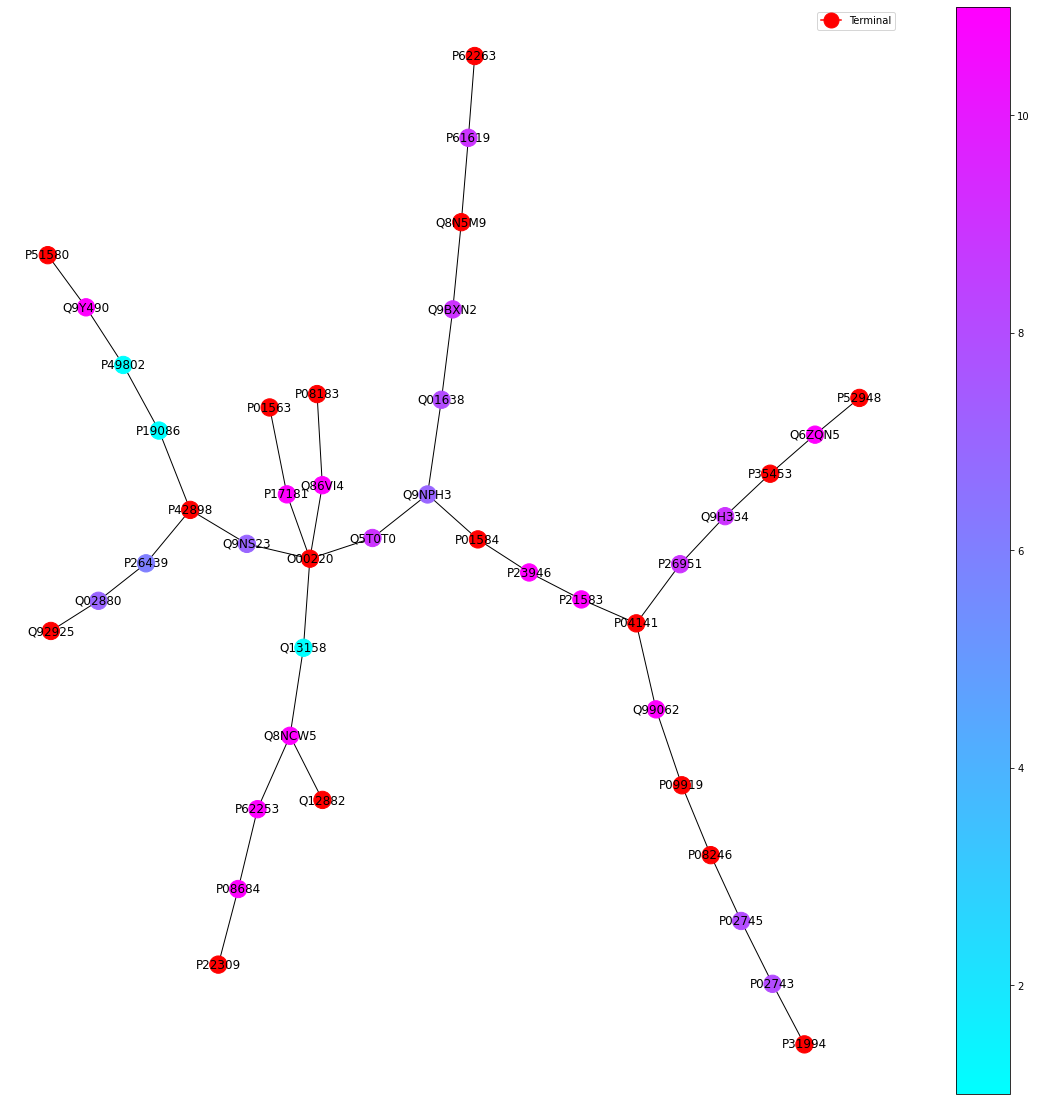

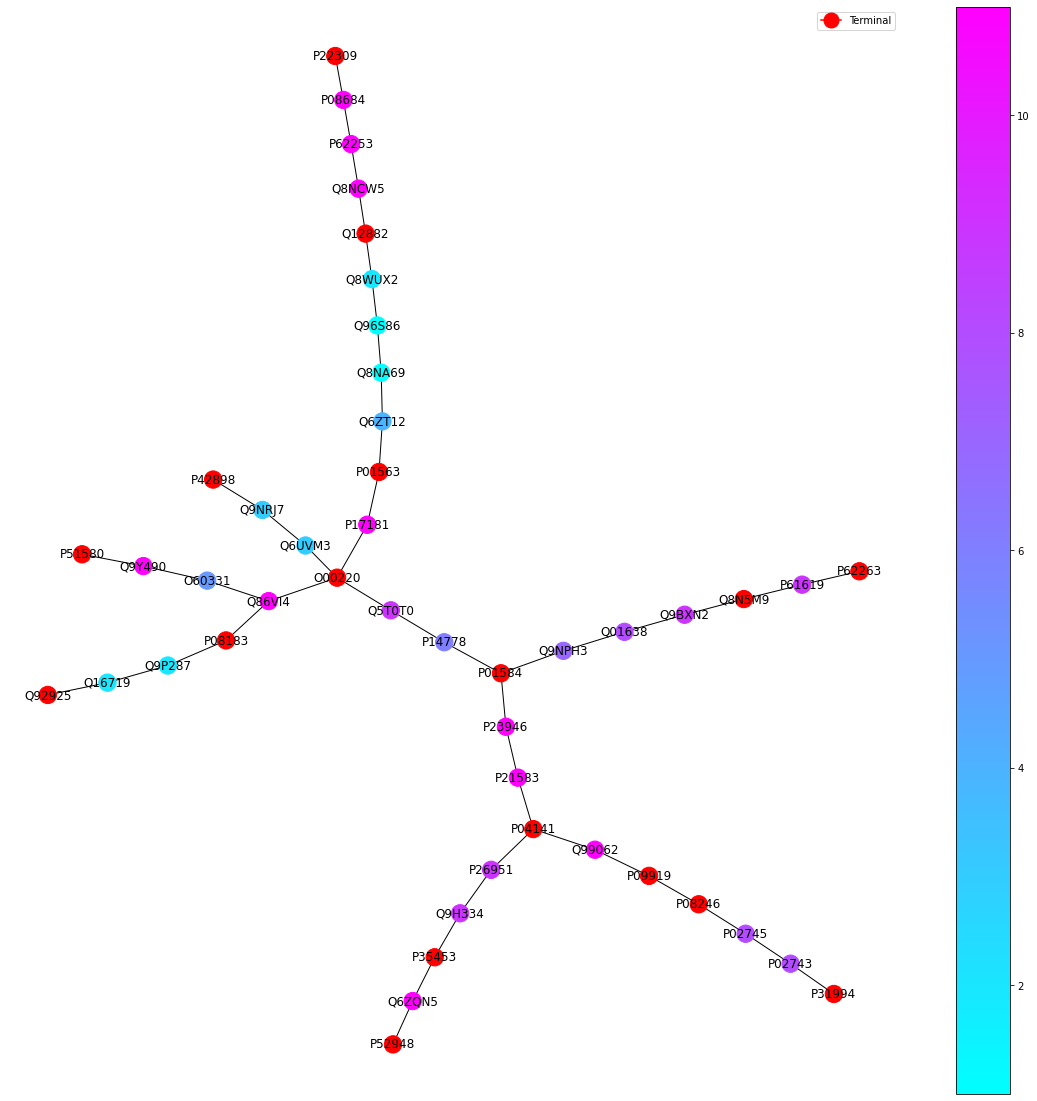

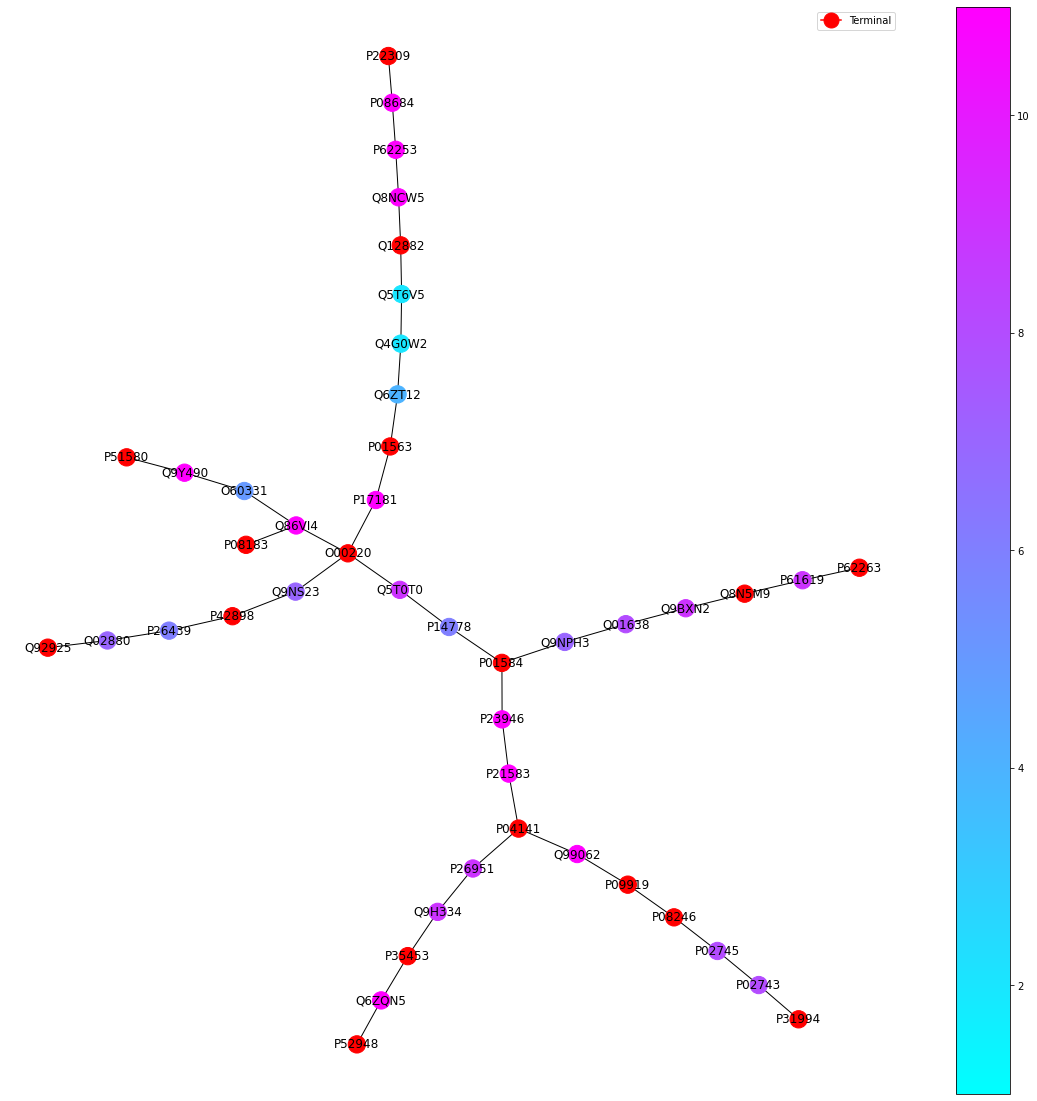

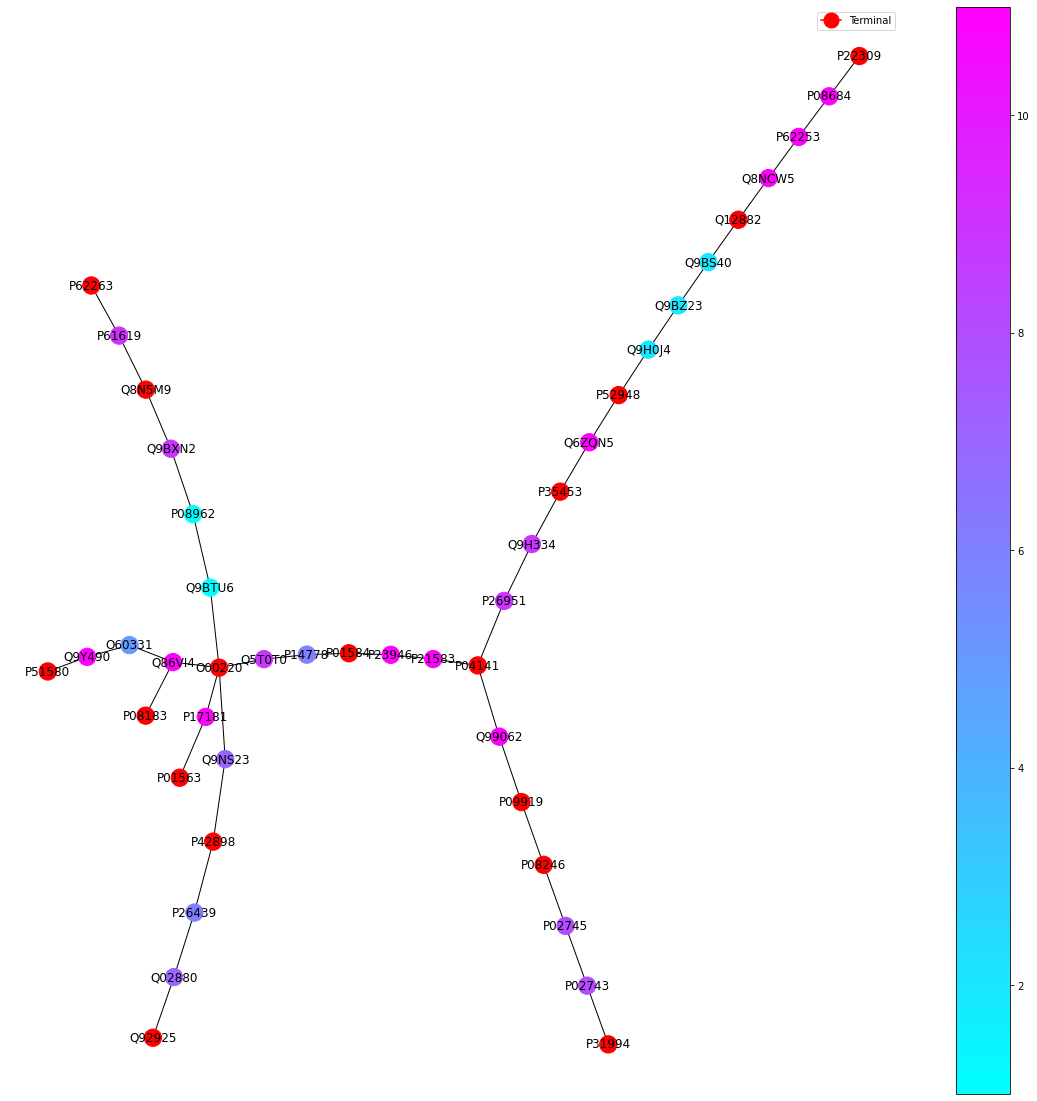

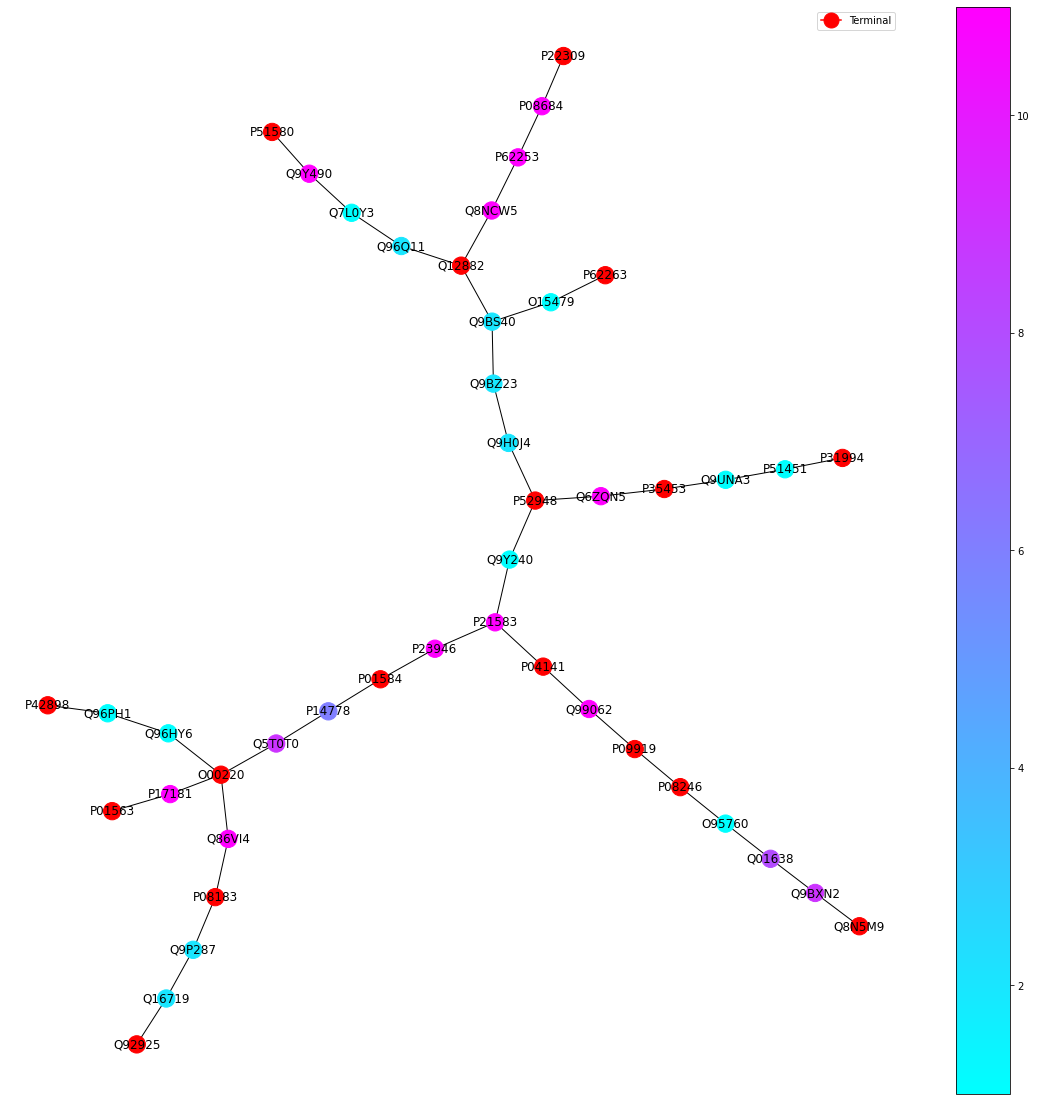

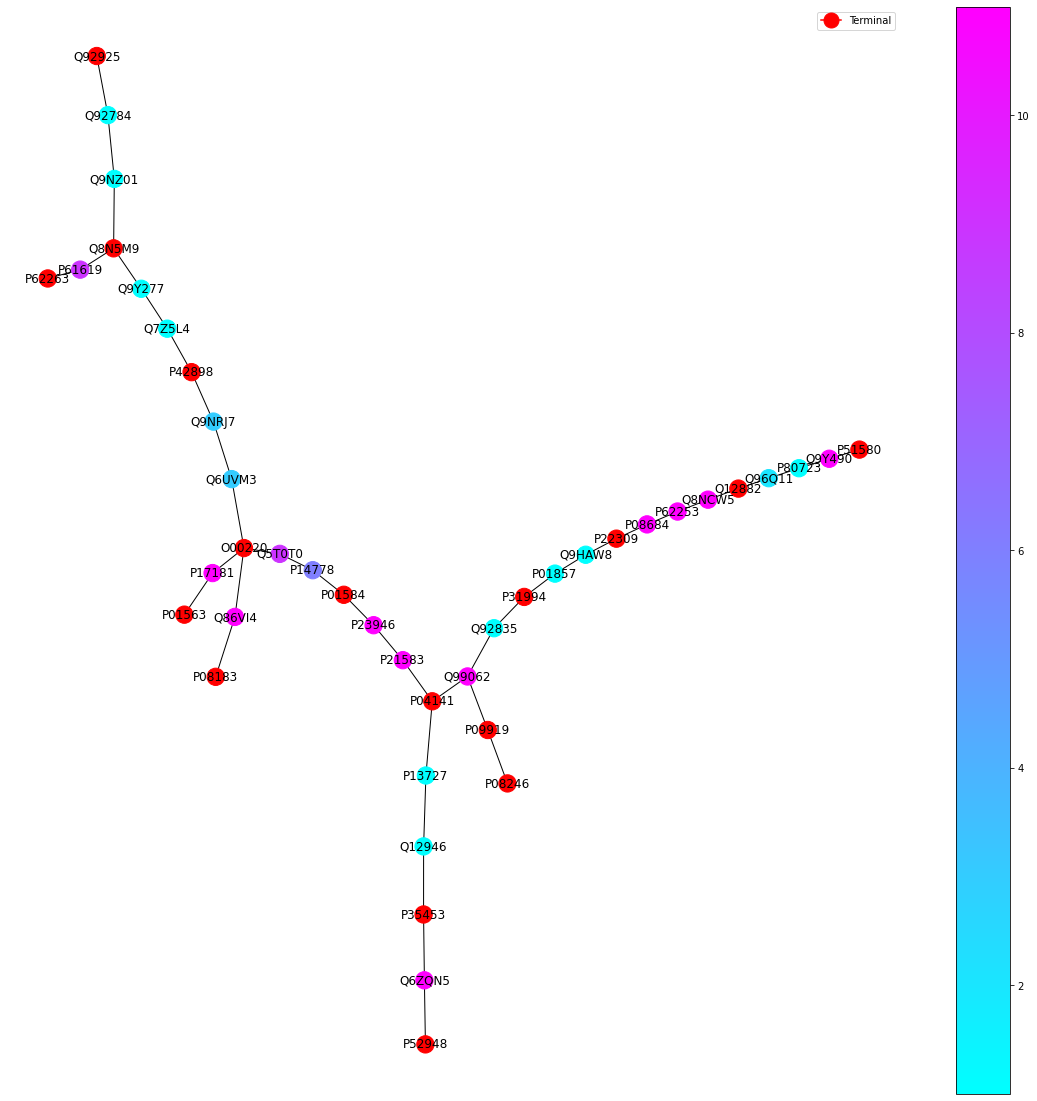

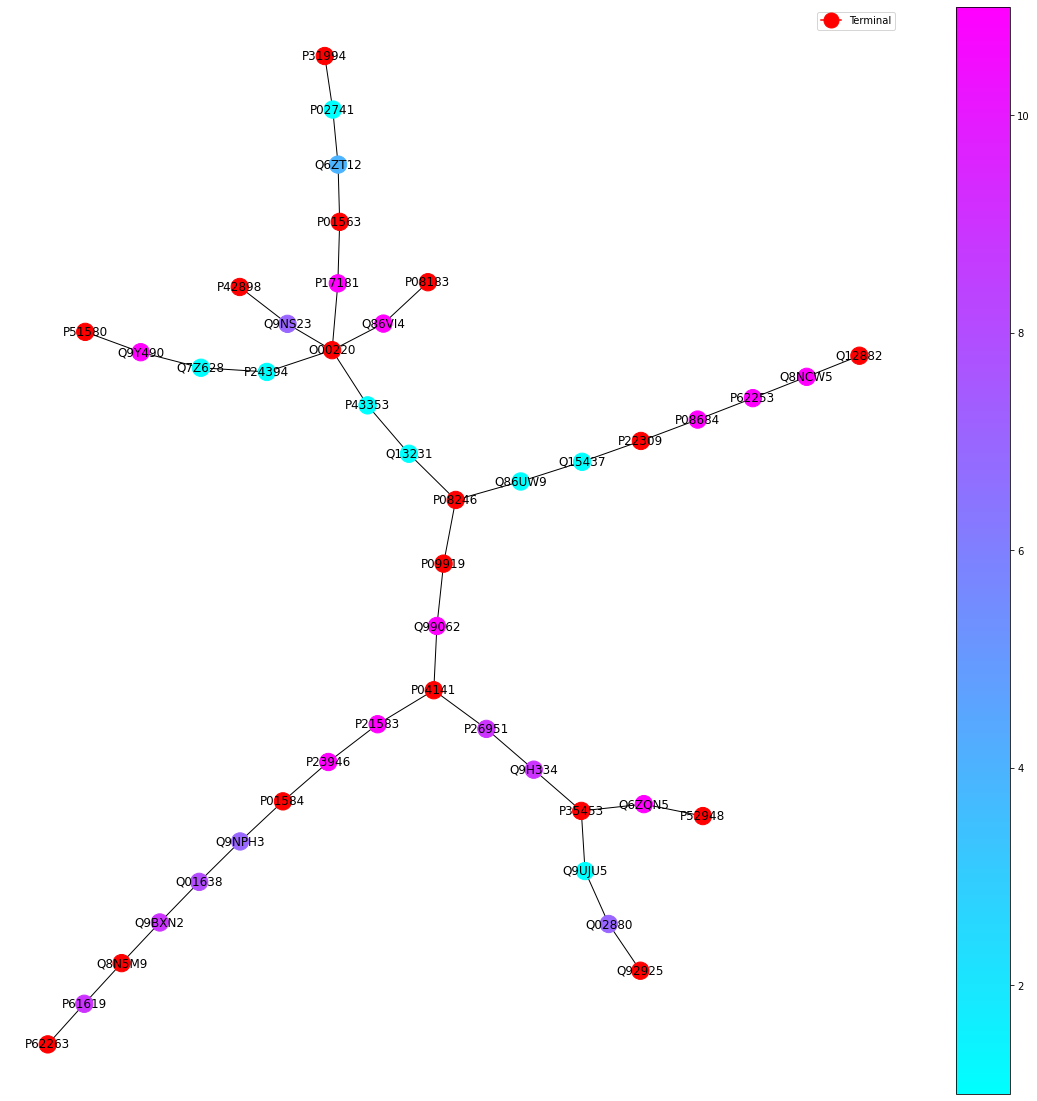

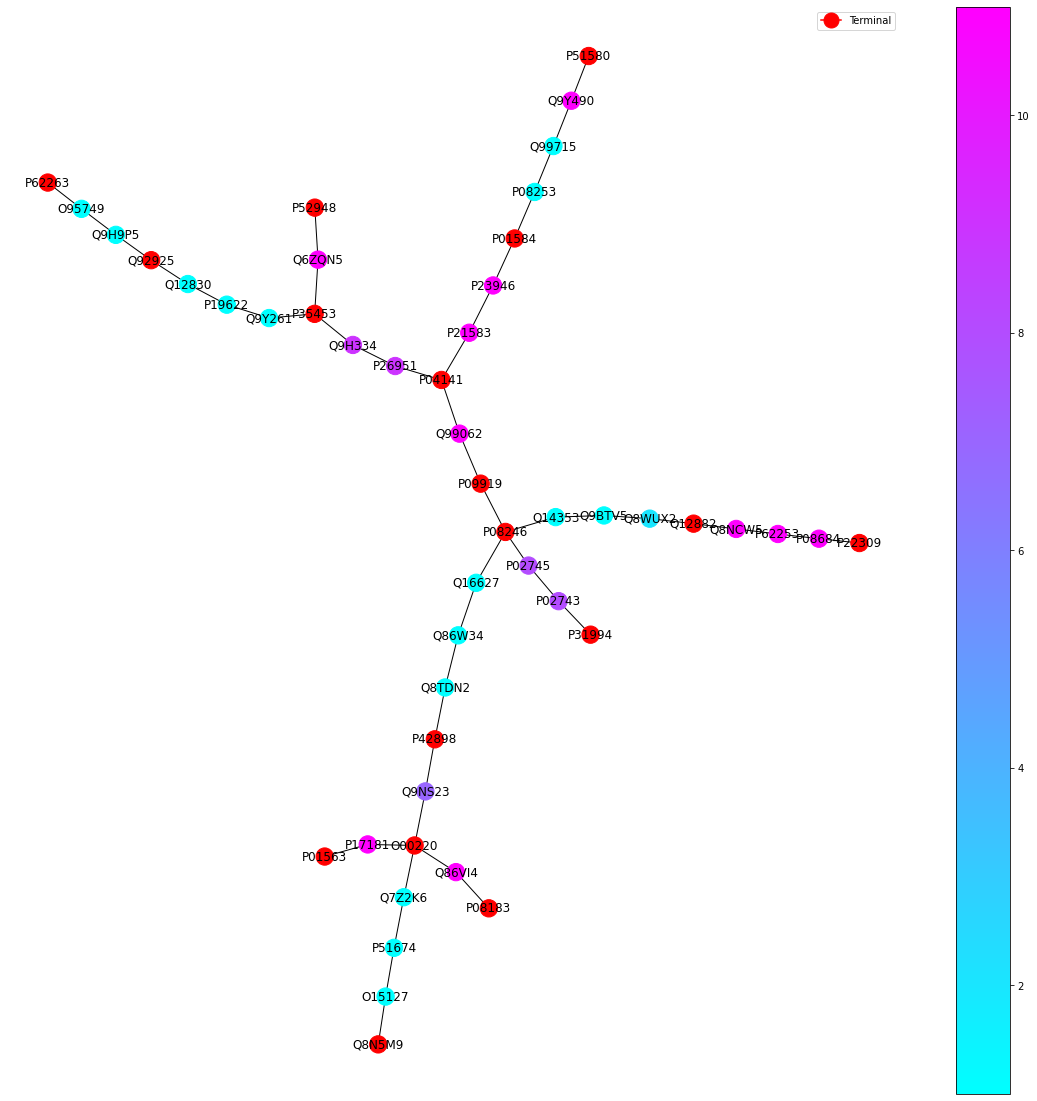

In [47]:
engine = ExpMinMaxDiverseSteinerTreeComputer(initial_fraction=0.2,
                                            reduction_factor=0.3)
# The most important parameter seems to be initial_fraction.
steiner_trees = engine(ppi_instance, n=10)
display_solution_set(steiner_trees)

We speak of edge weight for the instance and of edge costs for the pcst. The edge costs might be changed to obtain different pcst but will probably be identical in the beginning.


